In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
import os

In [5]:
print(os.listdir)

<built-in function listdir>


In [9]:
df = pd.read_csv("gender_submission.csv")

In [10]:
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [28]:
df.dtypes

PASSENGERID    int64
SURVIVED       int64
dtype: object

In [29]:
df.astype

<bound method NDFrame.astype of      PASSENGERID  SURVIVED
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]>

In [11]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [12]:
df.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [13]:
df.isnull()

,PassengerId,Survived
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
413,False,False
414,False,False
415,False,False
416,False,False


In [14]:
df.isnull().any()

PassengerId    False
Survived       False
dtype: bool

In [ ]:
df.isnull().any().any()

False

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [16]:
df.columns.str.upper()

Index(['PASSENGERID', 'SURVIVED'], dtype='object')

In [17]:
df.columns = df.columns.str.upper()

In [18]:
df

,PASSENGERID,SURVIVED
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


rename column


In [19]:
df.rename(columns={'SURVIVED':'PERSON'})

,PASSENGERID,PERSON
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [20]:
df['PASSENGERID']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PASSENGERID, Length: 418, dtype: int64

In [22]:
df['PASSENGERID'].mean()

1100.5

In [21]:
df.shape

(418, 2)

In [24]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [25]:
df.duplicated('PASSENGERID')

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [31]:
df.describe()

,PASSENGERID,SURVIVED
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


<ipython-input-35-4d2c796a0088>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SURVIVED"])


<Axes: xlabel='SURVIVED', ylabel='Density'>

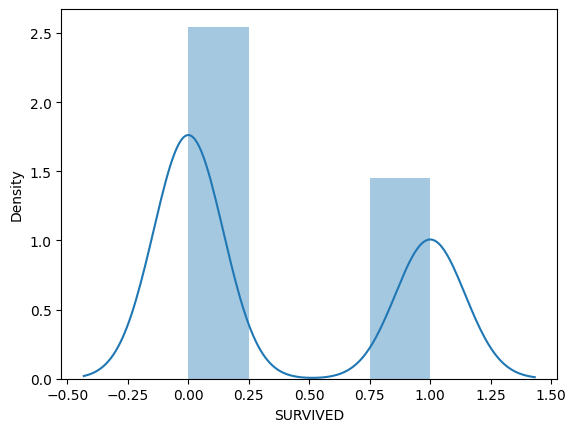

In [35]:
sns.distplot(df["SURVIVED"])

<Axes: >

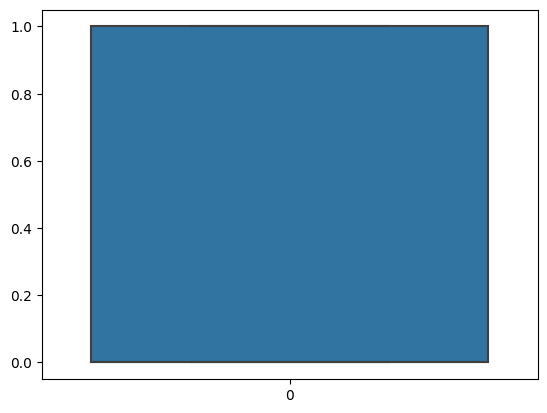

In [36]:
sns.boxplot(df["SURVIVED"])

In [37]:
# Calculate the upper and lower limits
Q1 = df['SURVIVED'].quantile(0.25)
Q3 = df['SURVIVED'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [38]:
upper_array = np.where(df['SURVIVED']>=upper)[0]
lower_array = np.where(df['SURVIVED']<=lower)[0]

In [39]:
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

In [40]:
print("New Shape: ", df.shape)

New Shape:  (418, 2)
